In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Tiến hành EDA dữ liệu: 
# a. Có bao nhiêu đặc trưng và tên đặc trưng
print('Số lượng đặc trưng:', len(df.columns))
print('Tên các đặc trưng:', df.columns)

Số lượng đặc trưng: 6
Tên các đặc trưng: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [9]:
# b. Có bao nhiêu chủng loài 
print('Số lượng chủng loài:', len(df['Species'].unique()))

Số lượng chủng loài: 3


In [10]:
# c. Tổng quan dữ liệu kiểu dữ liệu và dữ liệu thiếu 
print('Kiểu dữ liệu:', df.dtypes)
print('Dữ liệu thiếu:', df.isnull().sum())

Kiểu dữ liệu: Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Dữ liệu thiếu: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# d. Thống kê các đại lượng cơ bản cho các đặc trưng 
print('Thống kê các đại lượng cơ bản:', df.describe())

Thống kê các đại lượng cơ bản:                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [12]:
# e. Thống kê các đại lượng cơ bản cho các đặc trưng theo nhóm chủng loại 
print('Thống kê các đại lượng cơ bản theo nhóm chủng loại:', df.groupby('Species').describe())

Thống kê các đại lượng cơ bản theo nhóm chủng loại:                    Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

          

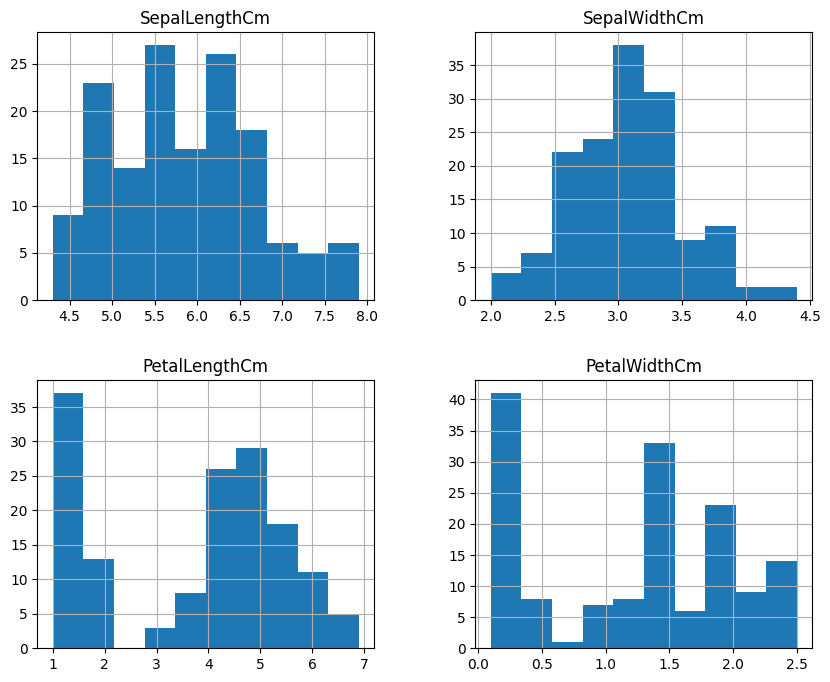

In [18]:
# f. Trực quan phân phối các đặc trưng và nhận xét
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].hist(figsize=(10, 8))
plt.show()

# Nhận xét (dựa trên dữ liệu mẫu):

# SepalLengthCm: Phân phối có thể bị lệch phải nhẹ, với giá trị tập trung từ 4.6 đến 6.7.
# SepalWidthCm: Phân phối khá đều, tập trung quanh 3.0-3.5.
# PetalLengthCm và PetalWidthCm: Có sự phân chia rõ rệt giữa hai nhóm (do sự khác biệt giữa các loài), với một nhóm nhỏ (~1.3-1.5) và một nhóm lớn hơn (~5.0-5.2)


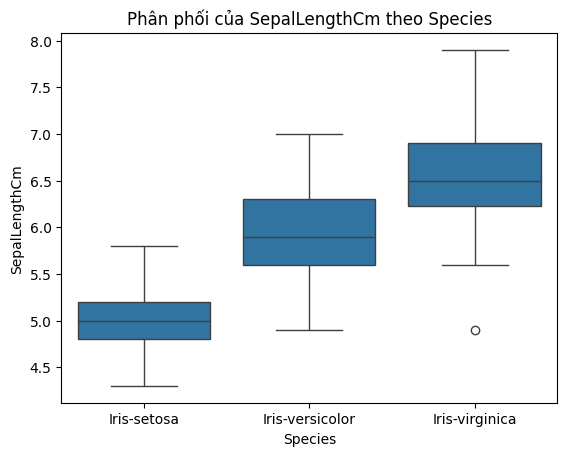

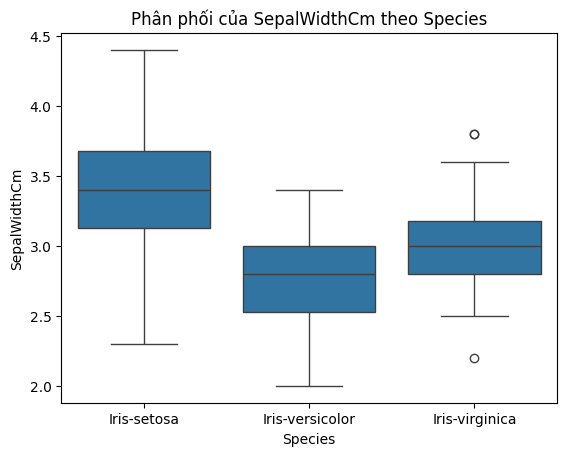

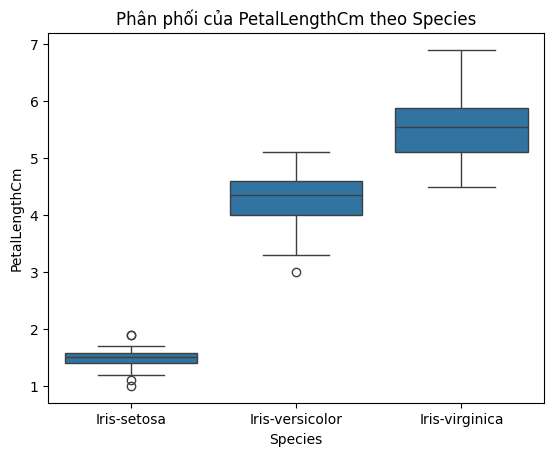

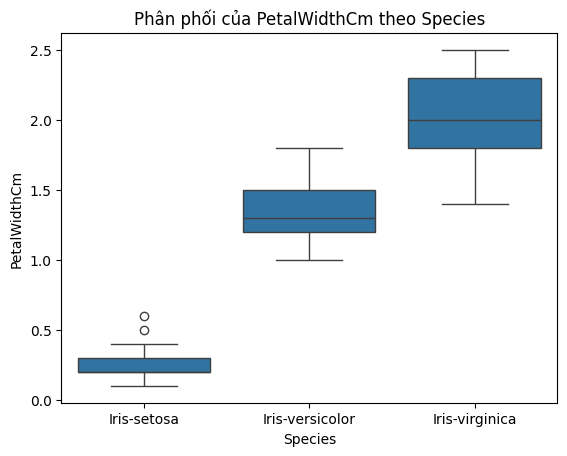

In [19]:
# g. Trực quan phân phối các đặc trưng theo nhóm chủng loài và nhận xét
for feature in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f"Phân phối của {feature} theo Species")
    plt.show()

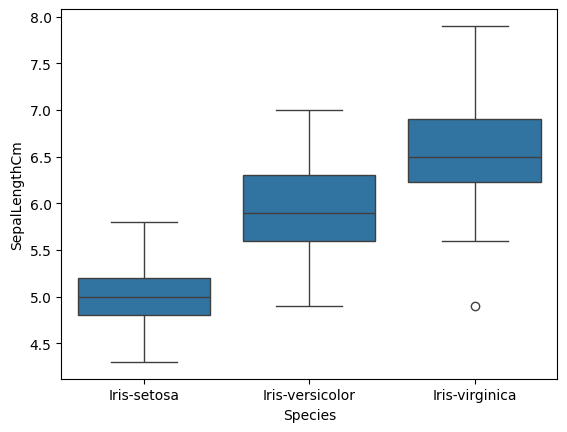

In [15]:
# h. Khám phá các giá trị bất thường của các đặc trưng theo nhóm chủng loài 
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.show()


In [22]:
# 2. Tập dữ liệu sử dụng tỉ lệ train:test là 75:25 với hệ số ngẫu nhiên là 16 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=16)
print('Kích thước tập train:', train.shape)
print('Kích thước tập test:', test.shape)




Kích thước tập huấn luyện: (112, 4)
Kích thước tập kiểm tra: (38, 4)


In [ ]:
# nhận xét:
# Tập huấn luyện: 112 mẫu (75% của 150).
# Tập kiểm tra: 38 mẫu (25% của 150).

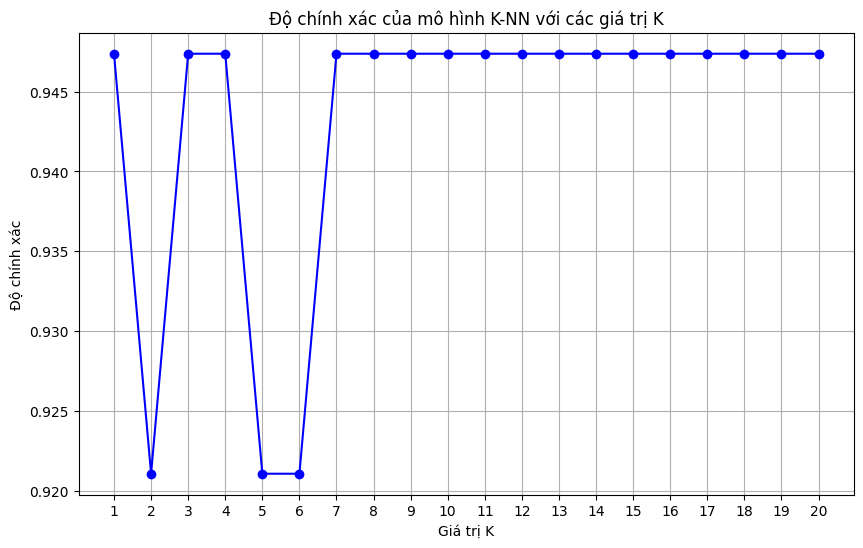

In [25]:
# 3. Sử dụng biểu đồ để tìm giá trị K tốt nhất cho mô hình K-NN dựa theo độ đo chính xác để 
# đánh giá.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = train['Species']
X_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test['Species']

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))  
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')  
plt.title('Độ chính xác của mô hình K-NN với các giá trị K')  
plt.xlabel('Giá trị K')  
plt.ylabel('Độ chính xác')  
plt.xticks(k_values)  
plt.grid(True) 
plt.show()

In [24]:
# 4. Sử dụng giá trị K tốt nhất để xây dựng mô hình
best_k = k_values[np.argmax(accuracies)]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Độ chính xác:', accuracy_score(y_test, y_pred))

# 5. Đánh giá mô hình

from sklearn.metrics import classification_report, confusion_matrix

print('Báo cáo phân loại:\n', classification_report(y_test, y_pred))
print('Ma trận nhầm lẫn:\n', confusion_matrix(y_test, y_pred))




Độ chính xác: 0.9473684210526315
Báo cáo phân loại:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38

Ma trận nhầm lẫn:
 [[13  0  0]
 [ 0 15  0]
 [ 0  2  8]]


In [27]:
# 5. Cho biết độ đo chính xác (accuracy) trên tập dữ liệu đánh giá (test data set)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)


# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình trên tập kiểm tra là:", accuracy)



Độ chính xác của mô hình trên tập kiểm tra là: 0.9473684210526315


Confusion Matrix:
 [[13  0  0]
 [ 0 14  1]
 [ 0  1  9]]


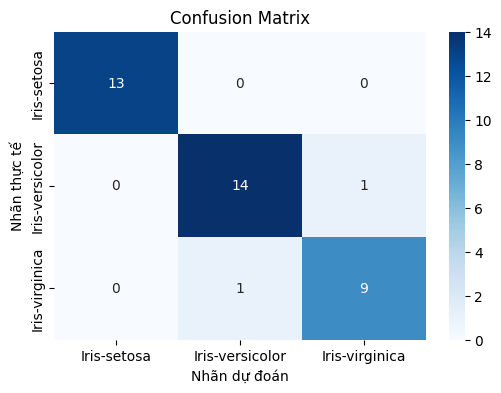

In [30]:
# 6. Xây dựng ma trận confusion matrix của mô hình trên tập dữ liệu test
# Import các thư viện cần thiết
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)

# Xây dựng ma trận confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Vẽ heatmap cho ma trận confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.show()

In [31]:
# 7. Với chủng loại: Iris-setosa
# a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recal, 
# F1]
from sklearn.metrics import confusion_matrix

# Giả sử y_test là nhãn thực tế, y_pred là nhãn dự đoán
# labels định nghĩa thứ tự lớp: Iris-setosa, Iris-versicolor, Iris-virginica
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Trích xuất các giá trị cho Iris-setosa
TP = conf_matrix[0, 0]  # Iris-setosa dự đoán đúng
FN = conf_matrix[0, 1] + conf_matrix[0, 2]  # Iris-setosa dự đoán sai thành versicolor hoặc virginica
FP = conf_matrix[1, 0] + conf_matrix[2, 0]  # Versicolor hoặc virginica dự đoán sai thành setosa
TN = conf_matrix[1, 1] + conf_matrix[1, 2] + conf_matrix[2, 1] + conf_matrix[2, 2]  # Các lớp khác dự đoán đúng

# Tính toán các chỉ số
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
FNR = FN / (TP + FN) if (TP + FN) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
TNR = TN / (FP + TN) if (FP + TN) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TPR
F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# In kết quả
print("Các giá trị [TN, FP, FN, TP]:", [TN, FP, FN, TP])
print("Các giá trị [TPR, FNR, FPR, TNR]:", [TPR, FNR, FPR, TNR])
print("Các giá trị [Precision, Recall, F1]:", [precision, recall, F1])


Các giá trị [TN, FP, FN, TP]: [np.int64(25), np.int64(0), np.int64(0), np.int64(13)]
Các giá trị [TPR, FNR, FPR, TNR]: [np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0)]
Các giá trị [Precision, Recall, F1]: [np.float64(1.0), np.float64(1.0), np.float64(1.0)]


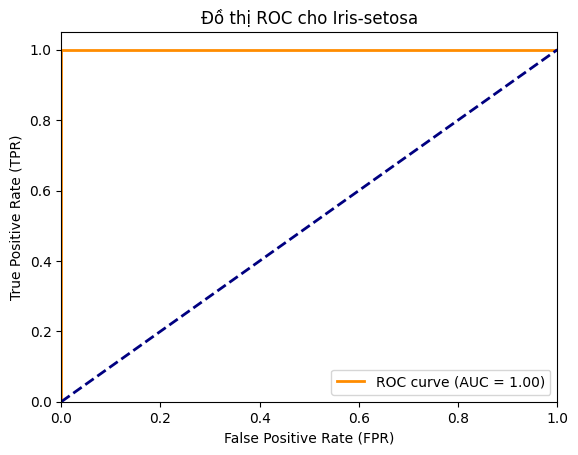

In [33]:
# b. Vẽ đồ thị AUC & ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Giả sử knn_best là mô hình đã huấn luyện, X_test là dữ liệu kiểm tra
# Chuyển nhãn thành nhị phân: 1 cho Iris-setosa, 0 cho các lớp khác
y_test_binary = (y_test == 'Iris-setosa').astype(int)
y_pred_prob = model.predict_proba(X_test)[:, 0]  # Xác suất cho lớp Iris-setosa

# Tính FPR, TPR và AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Đường tham chiếu
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Đồ thị ROC cho Iris-setosa')
plt.legend(loc="lower right")
plt.show()
# 8. Lưu trữ mô hình với tên file iris_k

In [35]:
import joblib

# Lưu mô hình với tên file 'iris_k.pkl'
joblib.dump(model, 'iris_k.pkl')



['iris_k.pkl']

In [36]:
# 9. Xây dựng chương trình dự báo chủng loại dựa trên các đặc trưng đầu vào.

# Đọc mô hình từ file
model = joblib.load('iris_k.pkl')


# Hàm dự báo chủng loại dựa trên các đặc trưng đầu vào

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Chuyển dữ liệu đầu vào thành DataFrame
    data = pd.DataFrame({
        'SepalLengthCm': [sepal_length],
        'SepalWidthCm': [sepal_width],
        'PetalLengthCm': [petal_length],
        'PetalWidthCm': [petal_width]
    })
    
    # Dự báo chủng loại
    species = model.predict(data)
    return species[0]

# Dự báo chủng loại cho một số mẫu
print(predict_species(5.1, 3.5, 1.4, 0.2)) 
print(predict_species(6.2, 2.9, 4.3, 1.3))  
print(predict_species(6.7, 3.3, 5.7, 2.5))  




Iris-setosa
Iris-versicolor
Iris-virginica


In [37]:
# 10. Với các đặc trưng SepalLengthCm=4.5, SepalWidthCm=2.7, PetalLengthCm=2.0,
# PetalWidthCm=0.24 thì mô hình phân lớp sẽ dự báo là chủng loại nào?

print(predict_species(4.5, 2.7, 2.0, 0.24))



Iris-setosa
